# Lab 2 - Fucniones con Imagenes

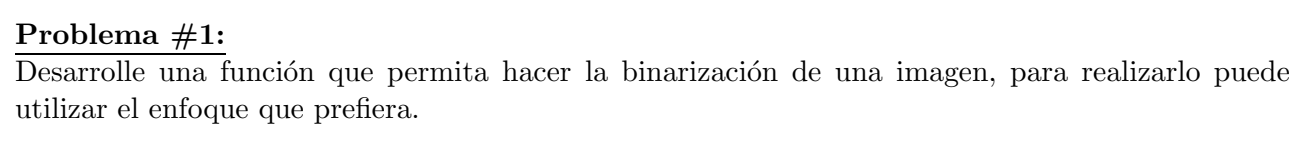

In [1]:
import cv2
import numpy as np

def to_grayscale_binary(img, threshold=127):
    img = cv2.imread(img, cv2.IMREAD_COLOR)
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Binarizar la imagen
    _, binary_img = cv2.threshold(gray_img, threshold, 255, cv2.THRESH_BINARY)

    return binary_img

a = to_grayscale_binary('foto1.jpg')


a

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [2]:
type('h')

str

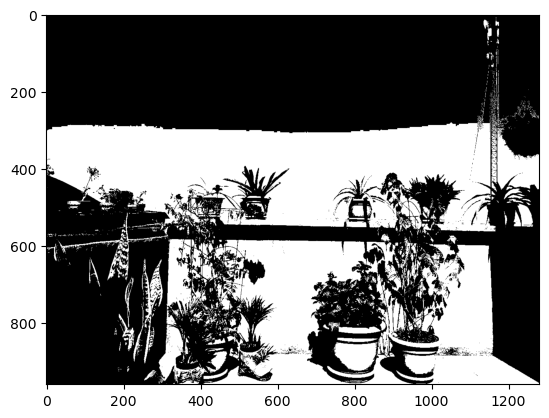

In [3]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os
import plotly.graph_objects as go


def img2GrayBin(image_name): 
    """Devuelve una imagen en blanco y negro binarizada"""
    if type(image_name) is str:
        img = cv2.imread(image_name, cv2.IMREAD_COLOR)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    else:
        img = image_name.copy()
        
    h = img.shape[0]
    b = img.shape[1]

    # espacios para crear imagenes
    monocrome_image = np.zeros((h, b, 1))
    binary_image = np.zeros((h, b, 1))

    # extraemos pixel por pixel
    for i in range(h):
        for j in range(b):
            pixel = img[i, j]

            R = pixel[0]
            G = pixel[1]
            B = pixel[2]

            gray_pixel = int(0.3*R + 0.59*G + 0.11*B) # media ponderada
            
            if gray_pixel > 127:
                binary_pixel = 1
            else:
                binary_pixel = 0


            monocrome_image[i,j] = gray_pixel
            binary_image[i,j] = binary_pixel

    monocrome_image = monocrome_image.astype(int)

    return monocrome_image, binary_image.astype(int)


img_gray , img_binary= img2GrayBin('foto2.jpg')

plt.imshow(img_binary, cmap='gray')

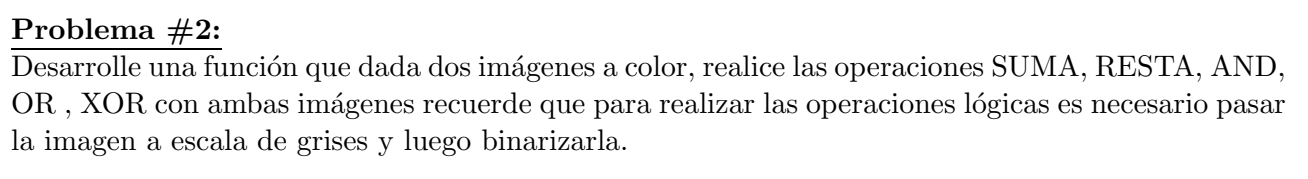

In [4]:
img_gray , img_binary= img2GrayBin('foto2.jpg')
img_gray2 , img_binary2= img2GrayBin('foto1.jpg')




In [5]:
img_gray

array([[[ 79],
        [ 79],
        [ 79],
        ...,
        [ 52],
        [ 50],
        [ 49]],

       [[ 79],
        [ 79],
        [ 79],
        ...,
        [ 70],
        [ 69],
        [ 67]],

       [[ 79],
        [ 79],
        [ 79],
        ...,
        [ 79],
        [ 78],
        [ 78]],

       ...,

       [[ 24],
        [ 26],
        [ 25],
        ...,
        [154],
        [141],
        [131]],

       [[ 24],
        [ 26],
        [ 24],
        ...,
        [155],
        [147],
        [142]],

       [[ 23],
        [ 25],
        [ 24],
        ...,
        [159],
        [160],
        [161]]])

In [6]:
img = cv2.cvtColor(cv2.imread('foto2.jpg'), cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(cv2.imread('foto1.jpg'), cv2.COLOR_BGR2RGB)



def image_operations(img1, img2):
    # Asegurarse de que ambas imágenes tienen el mismo tamaño
    if img1.shape != img2.shape:
        raise ValueError("Las imágenes deben tener el mismo tamaño")

    # Convertir las imágenes a escala de grises y binarias
    _, bin_img1 = img2GrayBin(img1)
    _, bin_img2 = img2GrayBin(img2)

    # Suma
    suma = np.clip(img1 + img2, 0, 255).astype('uint8')

    # Resta
    resta = np.clip(img1 - img2, 0, 255).astype('uint8')

    # AND
    i_and = (bin_img1 * bin_img2).astype('uint8')

    # OR
    i_or = np.clip(bin_img1 + bin_img2, 0, 1).astype('uint8')

    # XOR
    i_xor = np.bitwise_xor(bin_img1, bin_img2).astype('uint8')

    return suma, resta, i_and, i_or, i_xor


suma, resta, i_and, i_or, i_xor = image_operations(img, img2)



In [7]:
ops = ['suma', 'resta', 'i_and', 'i_or', 'i_xor']
for i, d in enumerate([suma, resta, i_and*255, i_or*255, i_xor*255]):
    cv2.imwrite(f'problema 2/{ops[i]}.jpg', d)


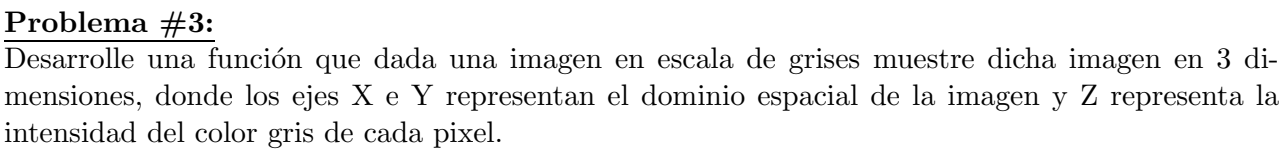

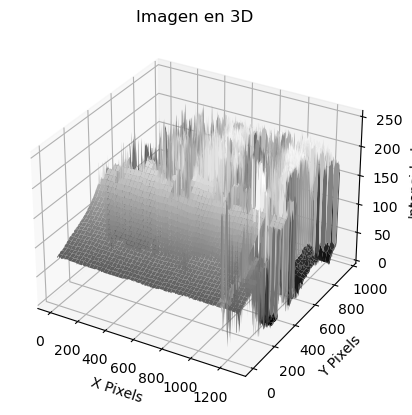

In [11]:

from mpl_toolkits.mplot3d import Axes3D
def plot_3d_image(img):
    # Abrir la imagen y convertirla a escala de grises

    # Convertir la imagen en una matriz numpy
    img_np = img.reshape(img.shape[0], img.shape[1]).copy()

    # Crear la grilla de coordenadas X, Y
    y = np.arange(0, img_np.shape[0])
    x = np.arange(0, img_np.shape[1])
    X, Y = np.meshgrid(x, y)

    fig = plt.figure()

    # Crear un ejes 3D
    ax = fig.add_subplot(111, projection='3d')

    ax.plot_surface(X, Y, img_np, cmap='gray')

    ax.set_title('Imagen en 3D')
    ax.set_xlabel('X Pixels')
    ax.set_ylabel('Y Pixels')
    ax.set_zlabel('Intensidad')

    plt.show()

plot_3d_image(img_gray)


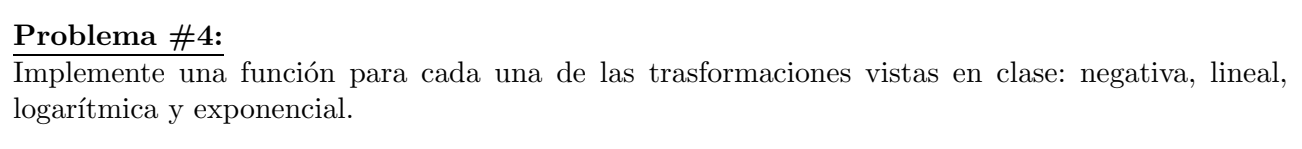

In [18]:

def image_transformations(img):

    # Negativa
    neg_img = 255 - img

    # Lineal
    a = 1
    b = 30
    linear_img = a * img + b
    linear_img = np.clip(linear_img, 0, 255) 

    # Logarítmica
    c = 255 / np.log(1 + np.max(img))  # Valor de c para normalizar
    log_img = c * np.log(1 + img)
    log_img = np.array(log_img, dtype=np.uint8)

    # Exponencial 
    c = 0.5
    gamma = 2
    exp_img = c * np.power(img, gamma)
    exp_img = np.clip(exp_img, 0, 255) 

    return neg_img, linear_img, log_img, exp_img

# Llamar a la función
neg_img, linear_img, log_img, exp_img = image_transformations(img_gray)


In [19]:
trans = ['neg_img', 'linear_img', 'log_img', 'exp_img']
for i, d in enumerate([neg_img, linear_img, log_img, exp_img]):
    cv2.imwrite(f'problema 4/{trans[i]}.jpg', d)


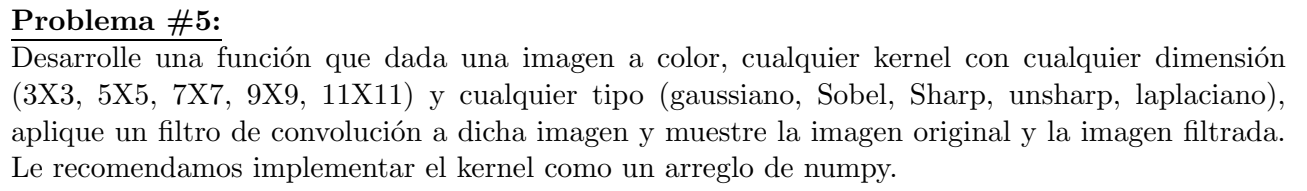

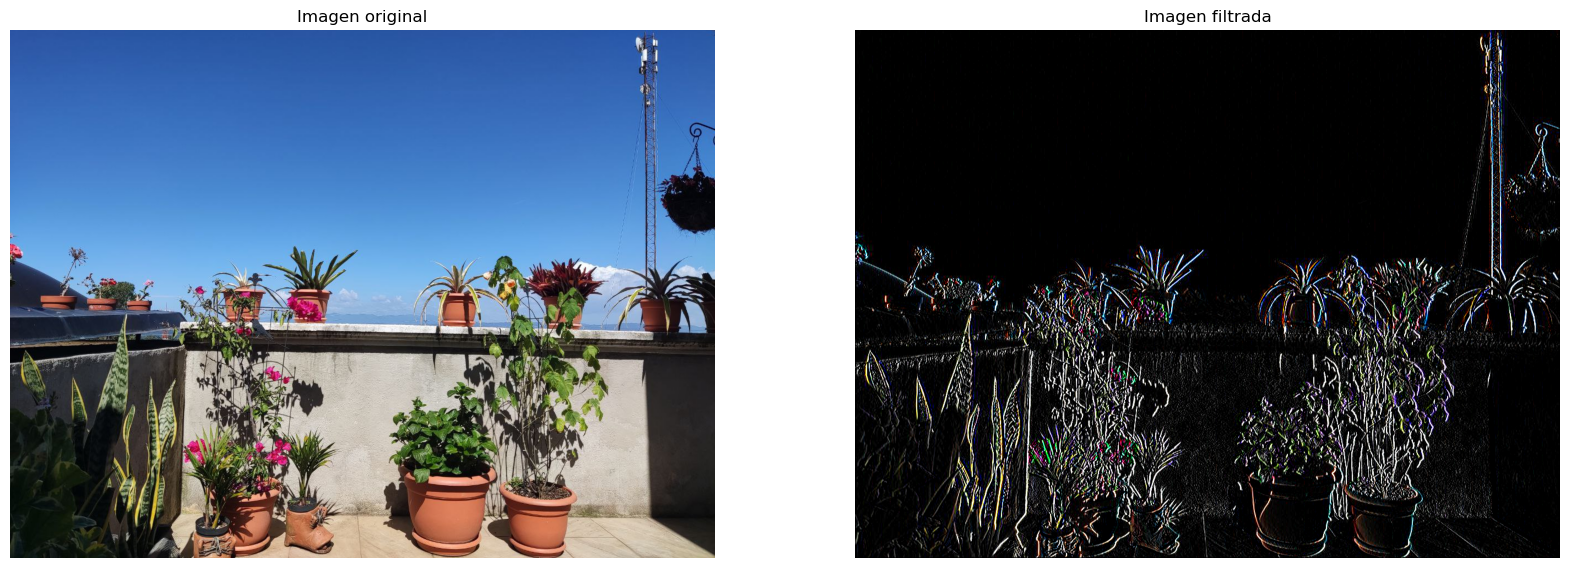

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [1., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [4., 0., 0.],
        [4., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [3., 3., 9.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [2., 2., 4.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

In [29]:
def convolution(img_path, kernel):
    # Cargar la imagen a color
    img = cv2.imread(img_path)
    
    # Convertir la imagen de BGR a RGB
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    # Obtener las dimensiones de la imagen y del kernel
    h, w, _ = img.shape
    kh, kw = kernel.shape
    
    # Crear una imagen vacía para guardar el resultado
    filtered_img = np.zeros((h, w, 3), dtype=np.float32)
    
    # Recorrer cada píxel de la imagen
    for y in range(kh // 2, h - kh // 2):
        for x in range(kw // 2, w - kw // 2):
            # Aplicar el kernel en el píxel y su vecindad
            for color in range(3):
                filtered_img[y, x, color] = np.sum(img[y - kh // 2:y + kh // 2 + 1, x - kw // 2:x + kw // 2 + 1, color] * kernel)
    
    # Normalizar la imagen resultante para que sus valores estén entre 0 y 255
    filtered_img = np.clip(filtered_img, 0, 255)
    
    # Crear una figura para mostrar las imágenes
    fig, axs = plt.subplots(1, 2, figsize=(20, 10))

    # Mostrar la imagen original
    axs[0].imshow(img)
    axs[0].set_title('Imagen original')
    axs[0].axis('off')

    # Mostrar la imagen filtrada
    axs[1].imshow(filtered_img.astype(np.uint8))
    axs[1].set_title('Imagen filtrada')
    axs[1].axis('off')

    # Mostrar la figura
    plt.show()
    return filtered_img



gaussian_kernel = np.array([[1, 2, 1], [2, 4, 2], [1, 2, 1]], np.float32) / 16.0  # 3x3 Gaussian blur
sobel_kernel = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]], np.float32)  # 3x3 Sobel vertical
sharp_kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]], np.float32)  # 3x3 sharpen
laplacian_kernel = np.array([[0, 1, 0], [1, -4, 1], [0, 1, 0]], np.float32)  # 3x3 laplacian


convolution('foto2.jpg', sobel_kernel)

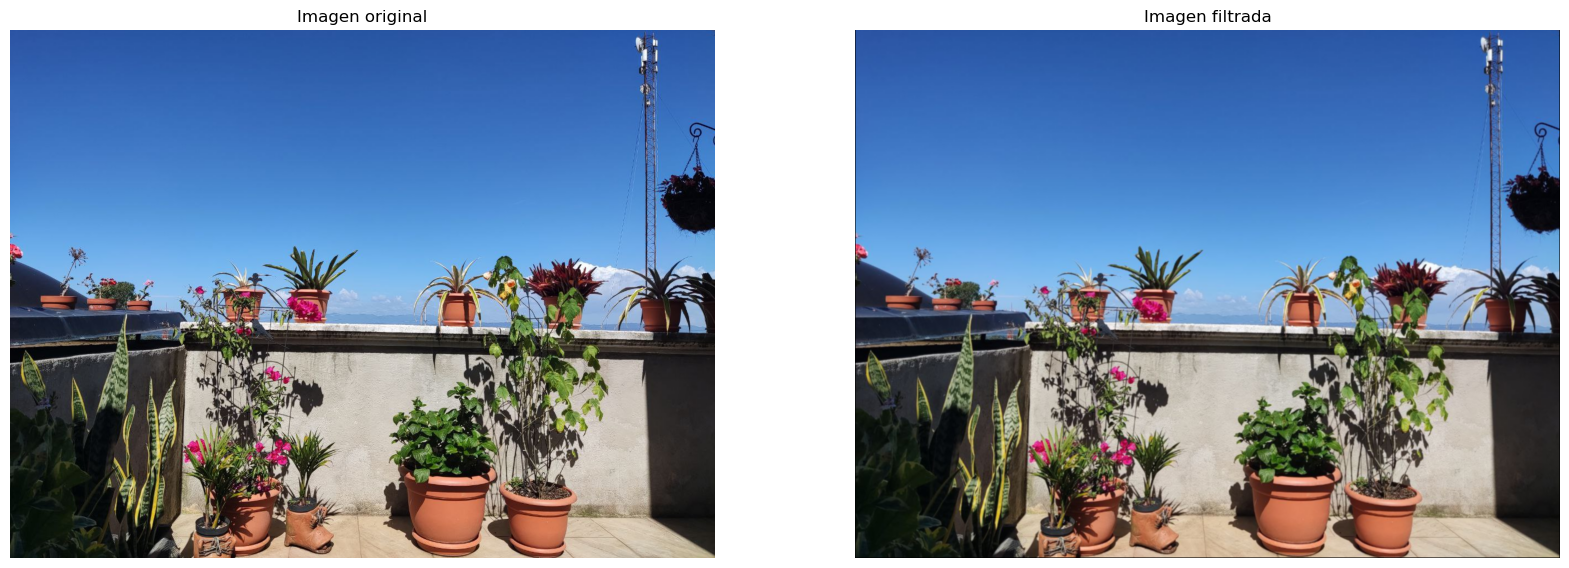

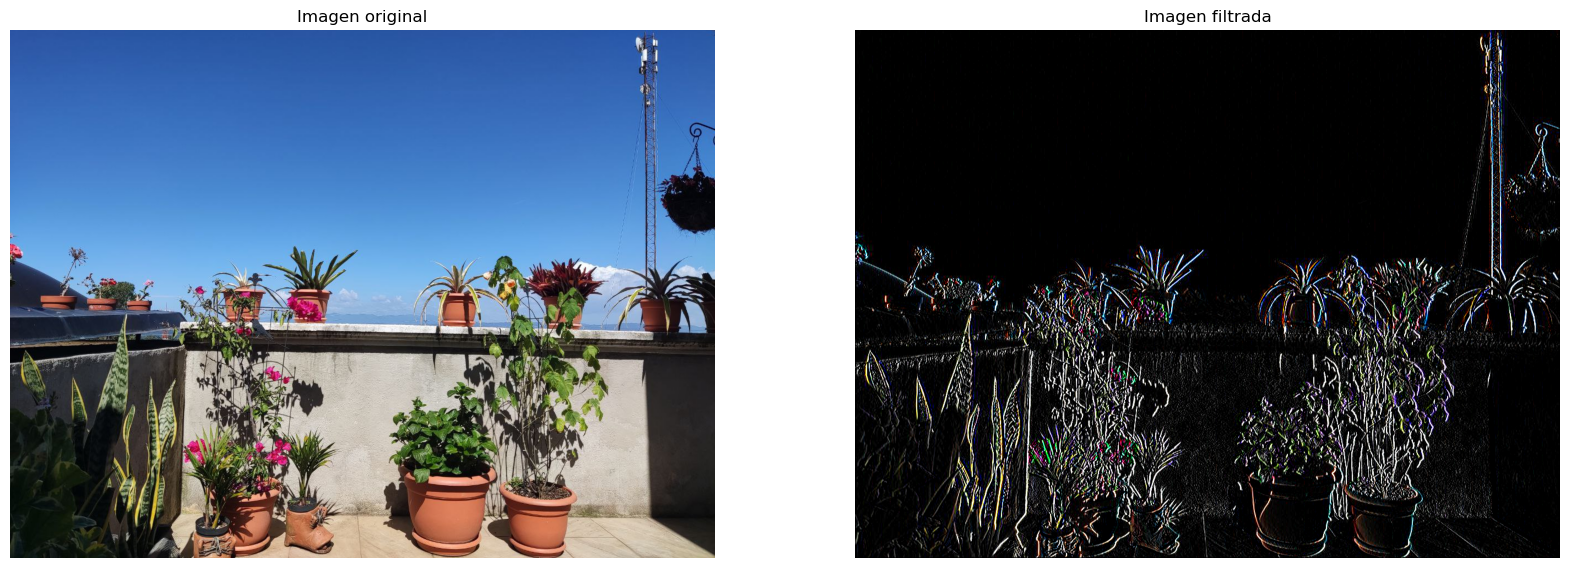

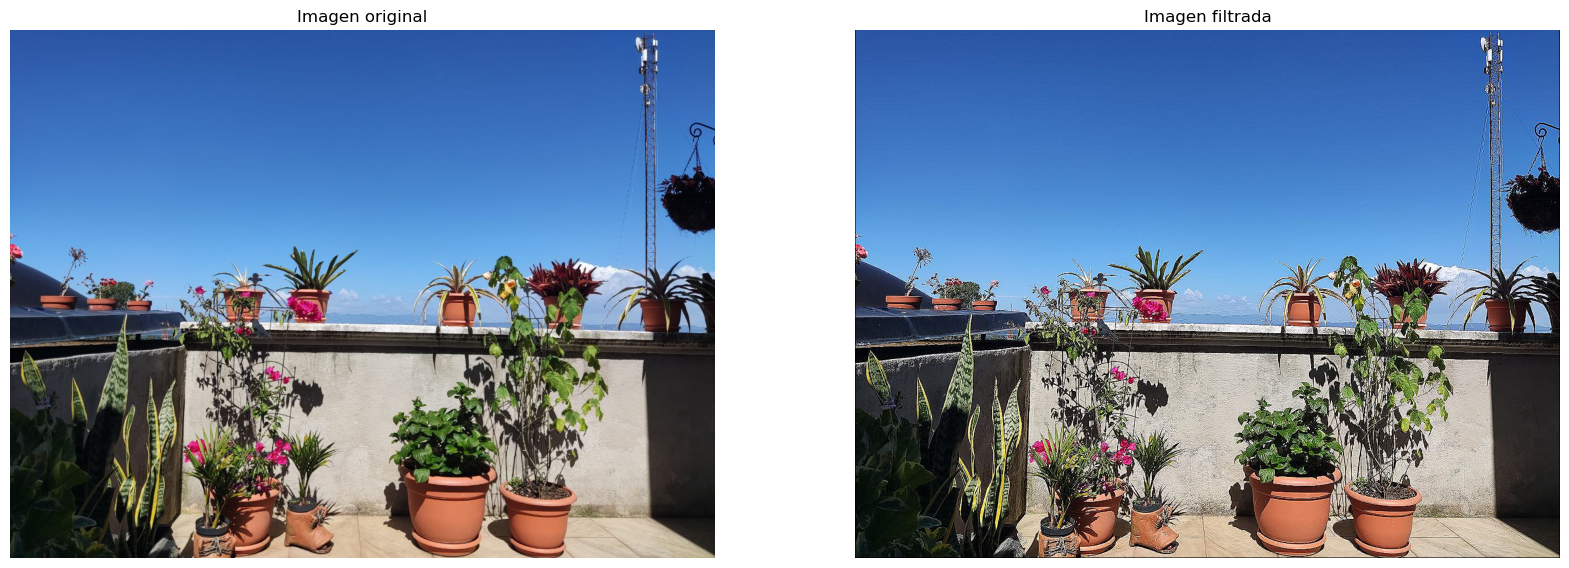

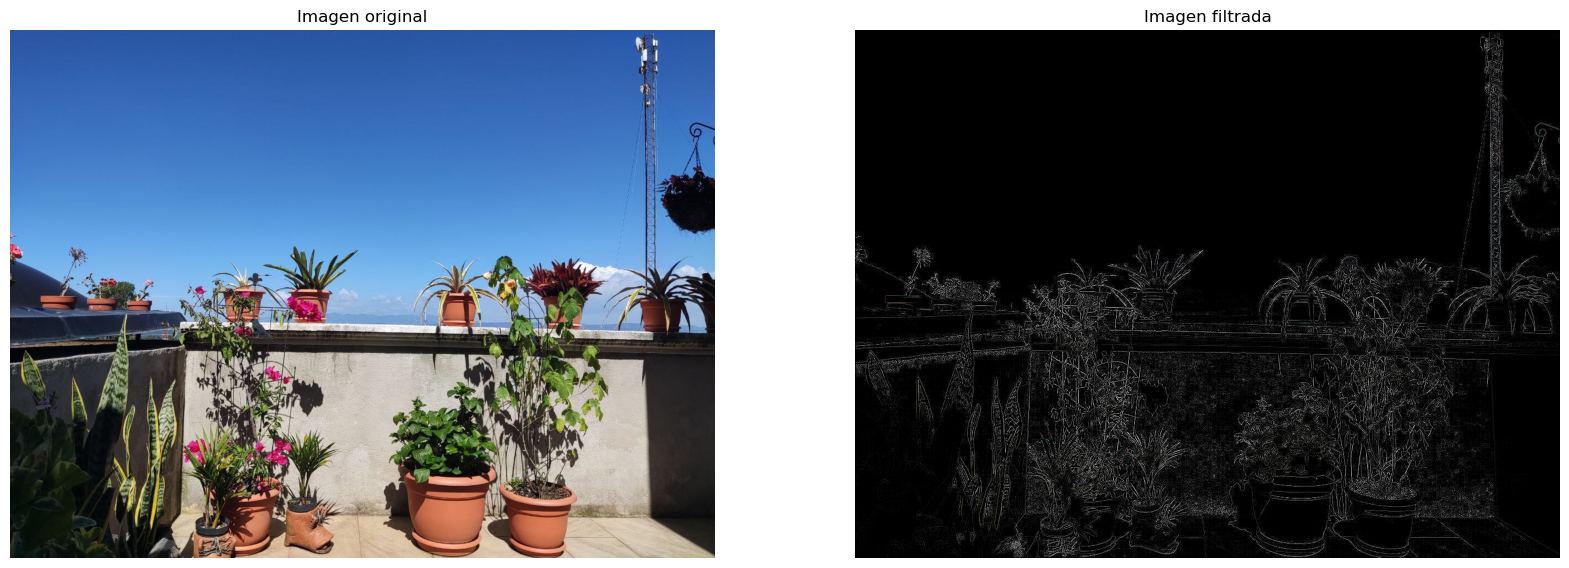

In [27]:
kers = ["gaussian_kernel ","sobel_kernel ","sharp_kernel ","laplacian_kernel"]



for i, d in enumerate([gaussian_kernel ,sobel_kernel ,sharp_kernel ,laplacian_kernel]):
    cv2.imwrite(f'problema 5/{kers[i]}.jpg', convolution('foto2.jpg', d))

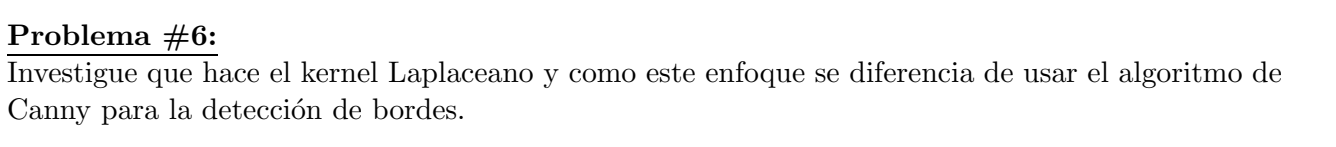

El filtro Laplaciano es un operador de detección de bordes que funciona calculando el Laplaciano de la imagen, es decir, la suma de las segundas derivadas. Intuitivamente, se puede pensar en el Laplaciano como una medida de la tasa de cambio en la intensidad de los píxeles de una imagen. En una región de la imagen donde la intensidad de los píxeles cambia rápidamente (como en el borde de un objeto), el valor del Laplaciano será alto.  

El filtro Laplaciano generalmente se aplica a una imagen que ha sido suavizada primero para reducir su sensibilidad al ruido. Sin embargo, debido a que el Laplaciano es muy sensible al ruido, este método de detección de bordes puede no funcionar bien si la imagen tiene mucho ruido.  

El algoritmo de Canny, por otro lado, es un algoritmo de detección de bordes más complejo que utiliza múltiples pasos para tratar de proporcionar una detección de bordes más precisa y menos propensa a errores. Los pasos del algoritmo de Canny incluyen:  

1. Aplicar un filtro Gaussiano para suavizar la imagen y reducir el ruido.
2. Calcular el gradiente de la imagen para encontrar la intensidad y dirección de los bordes.
3. Aplicar la supresión de no máximo para eliminar los píxeles que no forman parte de un borde.
4. Aplicar la umbralización con histéresis para determinar qué píxeles forman parte de bordes verdaderos y cuáles son ruido.  

En general, el algoritmo de Canny suele proporcionar resultados superiores a los del filtro Laplaciano, especialmente en presencia de ruido, debido a su enfoque multietapa y su uso de la umbralización con histéresis. Sin embargo, también es más computacionalmente intensivo. 